In [129]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [130]:
data = pd.read_csv('primates-morphology.csv')
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
0,37773,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,...,-0.301822,-0.433051,0.037651,-0.279618,-0.421040,Ph,Presbytis,hosei,U,A
1,37772,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,...,0.215340,-0.299550,0.709472,0.876382,-0.150133,Ph,Presbytis,hosei,F,A
2,22276,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,...,-0.481468,-0.243025,-0.537644,-0.140292,0.082158,Pr,Presbytis,rubicunda,U,A
3,37776,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,...,0.586941,-0.043639,-0.518699,-1.051100,0.542354,Pr,Presbytis,rubicunda,M,A
4,37777,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,...,0.653851,0.718319,0.798722,-0.396749,0.844772,Pr,Presbytis,rubicunda,F,A


In [131]:
df = data.copy()
df.drop('Abbreviation', axis=1, inplace=True)
df.drop('Genus', axis=1, inplace=True)
df.drop('Sex', axis=1, inplace=True)
df.drop('Age', axis=1, inplace=True)
df = df.iloc[: , 1:]

---

# PCA
first, i will do PCA, to find the most important features, which makes it eassier to cluster the data.

In [132]:
plotPCA1 = 0
plotPCA2 = 1

data2 = df.drop('Species', axis=1)
X = data2

pca = PCA(n_components=3)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
components2 = []
for i in components:
    components2.append([i[plotPCA1], i[plotPCA2]])

fig = px.scatter(components2, x=0, y=1, color=df['Species'])

for i, feature in enumerate(data2.columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, plotPCA1],
        y1=loadings[i, plotPCA2]
    )
    fig.add_annotation(
        x=loadings[i, plotPCA1],
        y=loadings[i, plotPCA2],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

In [133]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
components = pca.fit_transform(data2)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
)
fig.show()

### evaluation of PCA
from the pca-plots, we can see that it is very dificult to cluster this data, a lot of the clusters are not very well seperated, which makes clustering very hard.

---

# data selection
as shown in the plots above, we can see that the data is not well seperated, so we need to select the data that is well seperated. i will first seperate the ten species with the most samples.

In [134]:
dups = df.pivot_table(index = ['Species'], aggfunc ='size')
sorted_species = (dups.sort_values(ascending=False))[:6]
print(sorted_species.keys())
'''keep only rows containing the top # species'''
df2 = df[df['Species'].isin(sorted_species.keys())]


Index(['lar', 'cristata', 'mitis', 'badius', 'polykomos', 'torquatus'], dtype='object', name='Species')


In [135]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

species =  df2['Species']
#df = px.data.iris()
data2 = df2.drop('Species', axis=1)
X = data2

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
#print(components)
fig1 = px.scatter(components, x=0, y=1, color=species)

for i, feature in enumerate(data2.columns):
    fig1.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig1.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature[:3],
    )


In [136]:
#Import required module
from sklearn.cluster import KMeans
import plotly.graph_objects as go
#Initialize the class object
kmeans = KMeans(n_clusters= 6)
 
#predict the labels of clusters.
kmeans.fit(data2)
y_kmeans = kmeans.predict(data2)
centers = kmeans.cluster_centers_

centers2= []
for i in centers:
    centers2.append([i[0], i[1]])
print(centers2)

fig2 = px.scatter(centers2, x=0, y=1, range_color = [100, 500], size_max = 100)
fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.show()

[[107.03712343422296, 30.492743756423636], [-92.38046844258017, -30.864687717250277], [138.72803785784885, -101.87316973103566], [10.137471122060749, 32.126951552056305], [-42.16630731930894, -91.01604189320307], [78.62315183992824, 58.42462716251437]]


### evaluation
we can see that the chosen species are not very well seperated. this is a non-working approac. for example: the data of lar and cristana are seperated, which makes it dificult to cluster them. i will try to find species that are easier to cluster and run the same algorithm again. 

--------------------

### Data selection 2
from the PCA plots above, we can see that the following species well separated:
- gorilla
- albigena
- talapoin
- badius
- anubis

with this list of primates, i will continue.

In [137]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

plotPCA1 = 0
plotPCA2 = 1

list_of_desired_species = ['gorilla', 'albigena', 'talapoin', 'badius', 'anubis']



df2 = df[df['Species'].isin(list_of_desired_species)]

data2 = df2.drop('Species', axis=1)
X = data2

pca = PCA(n_components=3)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
components2 = []
for i in components:
    components2.append([i[plotPCA1], i[plotPCA2]])

fig = px.scatter(components2, x=0, y=1, color=df2['Species'])

fig.update_yaxes(
scaleanchor = "x",
scaleratio = 1,
)

for i, feature in enumerate(data2.columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, plotPCA1],
        y1=loadings[i, plotPCA2]
    )
    fig.add_annotation(
        x=loadings[i, plotPCA1],
        y=loadings[i, plotPCA2],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

### evaluation
we can see that with the chosen animals, the clusters are suitably separated. the only point of confusion could be the albigene, which is close to the talapoin.

In [138]:
#this piece of code is to enumarate the species in the dataframe, since some algorithms have dificulties with the species names.

species_series = df2.Species
df2.Species = pd.Categorical(df2.Species)
df2.Species = df2.Species.cat.codes
df2.head()

/var/folders/z7/01ndtdr56pn86m2ys1lwmlnh0000gn/T/ipykernel_41383/752081229.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/z7/01ndtdr56pn86m2ys1lwmlnh0000gn/T/ipykernel_41383/752081229.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Species
15,155.887844,-82.907261,-5.148445,6.597369,2.731860,-3.810235,-0.819725,0.850604,-0.157577,-0.052748,...,0.029231,1.212677,-0.463466,0.345521,1.120565,-0.359339,0.018604,0.307960,0.268744,4
16,153.083389,-85.735742,-3.255175,10.349544,6.696116,-4.461611,-1.503843,-1.093252,1.760146,-0.547969,...,0.066467,0.500971,-0.253714,0.401869,-0.303178,0.025247,0.220553,0.155178,0.510207,4
17,167.552306,-99.653398,-13.551779,1.769345,4.609142,-0.301289,-0.838139,-4.281979,0.254833,-0.316636,...,0.724975,-0.057630,0.754196,-0.394274,0.295847,0.188395,0.044689,-0.401908,-0.134499,4
18,165.318889,-87.389364,-15.970493,10.783070,2.353209,-0.534187,-2.654530,0.658179,-0.057433,-1.395649,...,0.118089,0.377068,0.280485,-0.785905,1.123303,0.514168,0.273705,-0.031242,0.388325,4
19,163.951435,-90.264580,-10.711944,4.082730,0.805236,0.212165,-1.540209,-1.276854,-0.320377,-1.350304,...,-0.965179,0.270429,-0.830071,-0.059577,0.975433,0.065369,0.191521,0.117691,0.480637,4


In [139]:
clustering_data = df2.drop('Species', axis=1)

--------

# DBscan
i chose DBscan, since it is pretty robust to outliers and can dicover weridly shaped clusters. first, i will try to find the best parameters for this algorithm, after which i implement it and evaluate it.

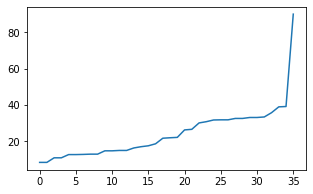

In [140]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(clustering_data) # fitting the data to the object
distances,indices=nbrs.kneighbors(clustering_data) # finding the nearest neighbours

# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

We can see that the elbow point is at 34, so we will normally use this as our eps values in the db-scan. however, using trial and error, I found that using 50 is a better value.

In [141]:
'''DBscan'''
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=50, min_samples=5).fit(clustering_data)
identified_clusters = dbscan.fit_predict(clustering_data)
labels = dbscan.labels_

data_with_clusters = clustering_data.copy()
data_with_clusters['Clusters'] = identified_clusters

plotPCA1 = 0
plotPCA2 = 1

pca = PCA(n_components=3)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
components2 = []
for i in components:
    components2.append([i[plotPCA1], i[plotPCA2]])

fig = px.scatter(components2, x=0, y=1, color=data_with_clusters['Clusters'])
fig.show()

fig = px.scatter(components, x=0, y=1, color=species_series)
fig.show()

### evaluation of the dbscan
we can see that the clusters are well separated, however, the DB-scan makes 3 clustering mistakes. it assumes the  outliers of anubis belong to the gorilla cluster, which is not right. it also assumes the albigena outlier belongs to the talapoin, which is predictable, since this outlier seem to way better fit in the talapoin cluster.

__________

# Kmeans Clustering
i chose to use the kmeans clustering algorithm, since it is an model perfectly suitable for finding groups in a dataset, with unlabeled data. the downside of k-means clustering is that it has trouble clustering data where clusters are of varying sizes and density, which is not the case in our dataset.

In [87]:
kmeans = KMeans(5)
kmeans.fit(clustering_data)

identified_clusters = kmeans.fit_predict(clustering_data)
identified_clusters

data_with_clusters = clustering_data.copy()
data_with_clusters['Clusters'] = identified_clusters



In [84]:
plotPCA1 = 0
plotPCA2 = 1

pca = PCA(n_components=3)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
components2 = []
for i in components:
    components2.append([i[plotPCA1], i[plotPCA2]])

fig = px.scatter(components2, x=0, y=1, color=data_with_clusters['Clusters'])
fig.show()

fig = px.scatter(components, x=0, y=1, color=species_series)
fig.show()

### evaluation of k-means clustering
We can see that K-clustering on the chosen species works very good, it makes two mistakes, by clustering the albigena at (-145.6, -67.8) and the anubis at (2.1, 18.4) wrong. this is understandable, since these are outliers of the normal cluster.

__________________________________________________________

# XGboost
i chose to use the XGboost algorithm, since it is one of the most popular algorithm in the machine learning community. it has proven itself on multiple machine learning contests, so it is interesting to test this boosting algorithm out. boosting is a technique that is used to improve the performance of a model by adding seperate models together.

In [119]:
'''xgboost'''
from xgboost import XGBClassifier
xgb = XGBClassifier().fit(clustering_data, df2.Species)
identified_clusters = xgb.predict(clustering_data)

data_with_clusters = clustering_data.copy()
data_with_clusters['Clusters'] = identified_clusters

In [120]:
plotPCA1 = 0
plotPCA2 = 1

pca = PCA(n_components=3)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
components2 = []
for i in components:
    components2.append([i[plotPCA1], i[plotPCA2]])

fig = px.scatter(components2, x=0, y=1, color=data_with_clusters['Clusters'])
fig.show()

fig = px.scatter(components, x=0, y=1, color=species_series)
fig.show()

### evaluation of xgboost
as seen, xg-boost shows a very good fit and only makes one mistake, by clustering the albigena at (-145.6, -67.8) wrong. this is to be expected, since it is an outlier, which is very close to another cluster. (including this one will also cause overfitting)

In [143]:
'''gaussian mixture'''
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(clustering_data, df2.Species)
identified_clusters = gmm.predict(clustering_data)

plotPCA1 = 0
plotPCA2 = 1

pca = PCA(n_components=3)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
components2 = []
for i in components:
    components2.append([i[plotPCA1], i[plotPCA2]])

fig = px.scatter(components2, x=0, y=1, color=data_with_clusters['Clusters'])
fig.show()

fig = px.scatter(components, x=0, y=1, color=species_series)
fig.show()
